In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [2]:
#kaggle link:  https://www.kaggle.com/code/prakharprasad/time-series-varma/input?select=M2SLMoneyStock.csv

# import data
df1= pd.read_csv(r"C:\Users\MMM\Downloads\Eco and finance\M2SLMoneyStock.csv")
df2= pd.read_csv(r"C:\Users\MMM\Downloads\Eco and finance\PCEPersonalSpending.csv")

In [3]:
new_df = pd.concat([df1,df2['Spending']],axis=1 , join='inner')
new_df.set_index('Date')
new_df.head()

,Date,Money,Spending
0,1/1/1995,3492.4,4851.2
1,2/1/1995,3489.9,4850.8
2,3/1/1995,3491.1,4885.4
3,4/1/1995,3499.2,4890.2
4,5/1/1995,3524.2,4933.1


<AxesSubplot:>

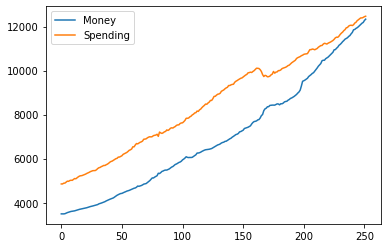

In [4]:
# plot the time series data
new_df.plot()

####    #stationary checking

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
test_result = adfuller(new_df['Money'])
test_result1 = adfuller(new_df['Spending'])

In [7]:
def adf_test(series,title = ''):
    print(f'Augumented Dicker - Fuller Test : {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic', 'p-value','#lags used','#observation']
    out = pd.Series(result[0:4],index = labels)
    for key,val in result[4].items():
        out[f'critical value({key})']=val
    print(out.to_string())
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
adf_test(new_df['Money'])

Augumented Dicker - Fuller Test : 
ADF test statistic       4.239022
p-value                  1.000000
#lags used               4.000000
#observation           247.000000
critical value(1%)      -3.457105
critical value(5%)      -2.873314
critical value(10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
adf_test(new_df['Spending'])

Augumented Dicker - Fuller Test : 
ADF test statistic       0.149796
p-value                  0.969301
#lags used               3.000000
#observation           248.000000
critical value(1%)      -3.456996
critical value(5%)      -2.873266
critical value(10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
#money
new_diff = np.sqrt(new_df['Money'])
df_diff = new_diff.diff().dropna()
adf_test(df_diff)

Augumented Dicker - Fuller Test : 
ADF test statistic    -6.694135e+00
p-value                4.039577e-09
#lags used             3.000000e+00
#observation           2.470000e+02
critical value(1%)    -3.457105e+00
critical value(5%)    -2.873314e+00
critical value(10%)   -2.573044e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
new_diff

0       59.096531
1       59.075376
2       59.085531
3       59.154036
4       59.364973
          ...    
247    109.985454
248    110.244274
249    110.397917
250    110.803430
251    111.067097
Name: Money, Length: 252, dtype: float64

In [11]:
# spending
new_diff_s = np.sqrt(new_df['Spending'])
df_diff_sp = new_diff_s.diff().dropna()
adf_test(df_diff_sp)

Augumented Dicker - Fuller Test : 
ADF test statistic    -7.282439e+00
p-value                1.488269e-10
#lags used             2.000000e+00
#observation           2.480000e+02
critical value(1%)    -3.456996e+00
critical value(5%)    -2.873266e+00
critical value(10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [24]:
new_diff_s

0       69.650556
1       69.647685
2       69.895636
3       69.929965
4       70.236031
          ...    
247    111.328343
248    111.322954
249    111.427555
250    111.580016
251    111.665124
Name: Spending, Length: 252, dtype: float64

In [12]:
# Model creation:

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.varmax import VARMAX

import warnings 
warnings.filterwarnings("ignore") 


In [14]:
new_df = new_df.dropna()  # Drop rows with missing values
new_df.isna().sum()

Date        0
Money       0
Spending    0
dtype: int64

In [15]:
new_df = new_df.drop('Date', axis=1)

In [16]:
p=2
q=1

In [17]:
model=VARMAX(new_df,order=(p,q))

In [18]:
results=model.fit()

In [19]:
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,252
Model:,"VARMA(2,1)",Log Likelihood,-2448.172
,+ intercept,AIC,4930.345
Date:,"Sat, 18 Nov 2023",BIC,4990.345
Time:,00:33:36,HQIC,4954.488
Sample:,0,,
,- 252,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.39, 7.95",Jarque-Bera (JB):,"499.27, 140.05"
Prob(Q):,"0.53, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"3.12, 0.85",Skew:,"1.26, 0.10"


In [29]:
# future prediction

forecast_steps = 5
forecast = results.forecast(steps = forecast_steps)

In [30]:
forecast

,Money,Spending
252,12386.260713,12501.451913
253,12433.535334,12535.368756
254,12478.524917,12570.019430
255,12521.768400,12604.846278
256,12563.627596,12639.476537


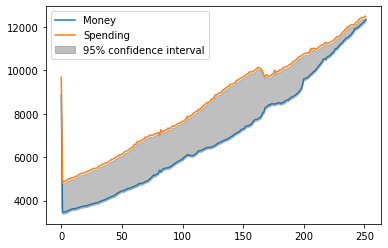

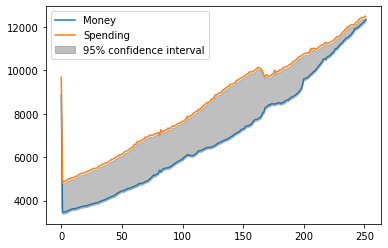

In [31]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results)